In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import math

In [2]:
docWord = np.load("science2k-doc-word.npy")
wordDoc = np.load("science2k-word-doc.npy")

In [3]:
vocab = []
with open("science2k-vocab.txt") as file:
    for line in file:
        line = line.strip()
        vocab.append(line)

In [4]:
titles = []
with open("science2k-titles.txt") as file:
    for line in file:
        line = line.strip()
        titles.append(line)

In [5]:
dfDocWord = pd.DataFrame(docWord, columns = vocab)
dfWordDoc = pd.DataFrame(wordDoc, columns = titles)

# 1a) science2k-doc-word analysis

In [6]:
meanArray = np.average(dfDocWord, axis=0)
np.shape(meanArray)

(5476,)

In [7]:
sse = []
centers = []
for i in range(1,25):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(dfDocWord)
    sse.append(kmeans.inertia_/len(dfDocWord))

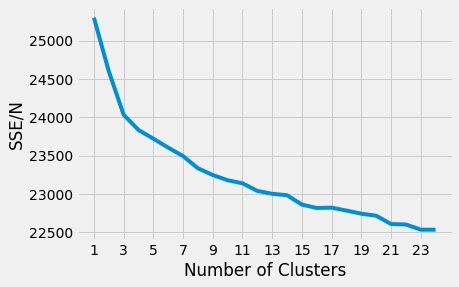

In [8]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 25), sse)
plt.xticks(range(1, 25,2))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE/N")
plt.show()

Here we select the number of clusters to be 8, as that value appears to fall right in the middle of the elbow when looking at SSE/N over an increasing number of clusters, from 1 to 25.

In [32]:
#selected value: k = 8
k = 8
final = KMeans(n_clusters = k, random_state = 42)
fitted = final.fit(dfDocWord)
centers = fitted.cluster_centers_
clusteredTopTenWords = []
clusteredTopTenTitles = []
labels = fitted.labels_
newDf = dfDocWord.copy()
newDf["Titles"] = titles
newDf["Label"] = labels
for i in range(len(centers)):
    center = centers[i]
    diff = center - meanArray
    top10words = np.argsort(diff)[::][:10]
    topTenWords = []
    for x in top10words:
        topTenWords.append(vocab[x])
    clusteredTopTenWords.append(topTenWords)
    clusterEntries = newDf[newDf['Label']==i]
    clusterData = clusterEntries.drop(['Titles','Label'], axis =1)
    dist = np.linalg.norm(clusterData.values - center, axis = 1)
    indices = np.argsort(dist)[::-1][:10]
    topTenTitles = []
    for y in indices:
        topTenTitles.append(titles[y])
    clusteredTopTenTitles.append(topTenTitles)
clusteredTopTenWords = pd.DataFrame(clusteredTopTenWords)
clusteredTopTenTitles = pd.DataFrame(clusteredTopTenTitles)

Below are the top ten words for each cluster in order of the largest positive distance from the difference between each cluster center and the mean $c_i-\bar{x}$. The clusters are each row, with the words being ranked left to right in order of largest to smallest distance. We then show the top ten titles that have the smallest distance to each cluster center, with rows being the clusters once again and the titles ordered left to right beginning with the closest title to the cluster center.

In [33]:
clusteredTopTenWords

,0,1,2,3,4,5,6,7,8,9
0,years,year,based,new,large,world,energy,figure,million,make
1,human,gene,years,protein,cells,genes,year,proteins,dna,activity
2,cells,cell,molecular,protein,human,gene,proteins,dna,genes,levels
3,fig,usa,observed,reports,addressed,correspondence,references,email,shown,respectively
4,fig,shown,reports,observed,correspondence,function,start,respectively,addressed,three
5,year,scientists,field,says,mail,researchers,focus,scientific,years,people
6,protein,gene,control,proteins,dna,department,genes,biology,factors,edu
7,cell,protein,cells,molecular,gene,proteins,dna,genes,expression,binding


In [34]:
clusteredTopTenTitles

,0,1,2,3,4,5,6,7,8,9
0,"""Prevention of Acute Liver Failure in Rats wit...","""Reaction of Plutonium Dioxide with Water: For...","""A Critical Role for Murine Complement Regulat...","""Corrections and Clarifications: Luzia Is Not ...","""Statistics of Ancestral Roots""","""Global Biodiversity Scenarios for the Year 2100""","""Clinical Research""","""Restoration-A Misnomer?""","""Corrections and Clarifications: The Elusive C...","""Retraction"""
1,"""Reaction of Plutonium Dioxide with Water: For...","""The Problematic Venture Capitalist""","""A Population of Murine gd T Cells That Recogn...","""Synaptic Assembly of the Brain in the Absence...","""DNA Topoisomerase IIb and Neural Development""","""Childhood Cancer""","""Evidence for DNA Loss as a Determinant of Gen...","""Clonal Propagation of Primate Offspring by Em...","""Ethanol-Induced Apoptotic Neurodegeneration a...","""Crystal Structure of gd T Cell Receptor Ligan..."
2,"""Into the Lair of the Beast""","""Reading the Worm Genome""","""Resistance to Bt Toxins""","""Charon's First Detailed Spectra Hold Many Sur...","""New Probe to Chart the Milky Way""","""Baedeker's Guide, or Just Plain 'Trouble'?""","""Brane-Worlds""","""Corrections and Clarifications: Commercializa...","""A Crushing End for Our Galaxy""","""Nota Bene: Sensing Old Age"""
3,"""Cool Glacial Temperatures and Changes in Mois...","""Connectivity of Marine Populations: Open or C...","""Diversity in Inhibition""","""Waiting for Organ Transplantation""","""Three-Dimensional Direct Imaging of Structura...","""Evidence for a Low-Density Universe from the ...","""New Probe to Chart the Milky Way""","""Regulation of Abscisic Acid-Induced Stomatal ...","""Duchamp's L.H.O.O.Q.-From 1919 or 1930?""","""The Dark Halo of the Milky Way"""
4,"""From Turin to Stockholm via St. Louis and Rio...","""Low (Sub-1-Volt) Halfwave Voltage Polymeric E...","""HIV Infection and Dementia""","""Corrections and Clarifications: Marking Time ...","""How Animals Move: An Integrative View""","""From Sequence to Chromosome: The Tip of the X...","""Corrections and Clarifications: Physicists an...","""Physical Hazards of Tailings Dams""","""Intimations of Immortality""","""Sink or Swim: Strategies for Cost-Efficient D..."
5,"""A Short Fe-Fe Distance in Peroxodiferric Ferr...","""A Critical Role for Murine Complement Regulat...","""The Changing Morphology and Increasing Decele...","""Protein Interaction Mapping in C. elegans Usi...","""Distal Initiation and Active Propagation of A...","""A Mammalian <latex>$H^+$</latex> Channel Gene...","""Corrections and Clarifications: The Elusive C...","""Corrections and Clarifications: First-Princip...","""Waiting for Organ Transplantation""","""Corrections and Clarifications: Identificatio..."
6,"""Charon's First Detailed Spectra Hold Many Sur...","""Tracing the Origins of Salmonella Outbreaks""","""Archaeology in the Holy Land""","""Resistance to Bt Toxins""","""Duchamp's L.H.O.O.Q.-From 1919 or 1930?""","""Baedeker's Guide, or Just Plain 'Trouble'?""","""Reading the Worm Genome""","""Corrections and Clarifications: Commercializa...","""Brane-Worlds""","""Corrections and Clarifications: First-Princip..."
7,"""Regulation of JNK by Src during Drosophila De...","""Creating a Protein-Based Element of Inheritance""","""Resistance to Bt Toxins""","""Honeybee Navigation: Nature and Calibration o...","""A Subclass of Ras Proteins That Regulate the ...","""New Age Semiconductors Pick up the Pace""","""Voltage- and Tension-Dependent Lipid Mobility...","""Cloning and Heterologous Expression of the Ep...","""Reaping the Plant Gene Harvest""","""Regulation of Protein Secretion through Contr..."


The algorithm here has captured top words across different groups of articles, as well as articles that have similar composition to each other. It is interesting to note the common words that have the largest distance from the demeaned cluster centers, as these might tell us less information specificity but are highly used. We can look at the clusters to see which articles are written with similar verbage, which can provide insights depending on what the top titles are. If we do this and find that most articles on one specific topic came up, we can have a better idea of what a new article might contain or be able to write our own article more accurately in the form that is in our data.

# 1b) science2k-word-doc analysis

In [12]:
newMeanArray = np.average(dfWordDoc, axis = 0)

In [13]:
sse = []
centers = []
for i in range(1,25):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(dfWordDoc)
    sse.append(kmeans.inertia_/len(dfWordDoc))

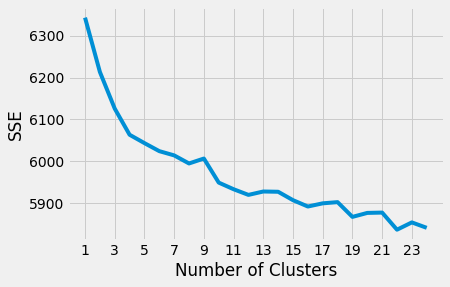

In [14]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 25), sse)
plt.xticks(range(1, 25,2))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Here we select the number of clusters to be 4, as that value appears to be one clear elbow point when looking at SSE/N over an increasing number of clusters, from 1 to 25. We prefer to keep the model simpler so chose the first elbow point we saw instead of one of the later ones, as there are multiple in the chart.

In [31]:
#selected value: k = 4
k = 4
final = KMeans(n_clusters = k, random_state = 42)
fitted = final.fit(dfWordDoc)
centers = fitted.cluster_centers_
clusteredTopTenTitles = []
clusteredTopTenVocab = []
labels = fitted.labels_
newDf = dfWordDoc.copy()
newDf["Vocab"] = vocab
newDf["Label"] = labels
totRows  = 0
for i in range(len(centers)):
    center = centers[i]
    diff = center - newMeanArray
    top10Titles = np.argsort(diff)[::][:10]
    topTenTitles = []
    for x in top10Titles:
        topTenTitles.append(titles[x])
    clusteredTopTenTitles.append(topTenTitles)
    clusterEntries = newDf[newDf['Label']==i]
    clusterData = clusterEntries.drop(['Vocab','Label'], axis =1)
    dist = np.linalg.norm(clusterData.values - center, axis = 1)
    indices = np.argsort(dist)[::-1][:10]
    topTenVocab = []
    for y in indices:
        topTenVocab.append(vocab[y])
    clusteredTopTenVocab.append(topTenVocab)
print(totRows)
clusteredTopTenTitles = pd.DataFrame(clusteredTopTenTitles)
clusteredTopTenVocab = pd.DataFrame(clusteredTopTenVocab)

5476


In [28]:
clusteredTopTenTitles

,0,1,2,3,4,5,6,7,8,9
0,"""Kinesin Superfamily Motor Protein KIF17 and m...","""Dual Signaling Regulated by Calcyon, a D1 Dop...","""Structure of the Light-Driven Chloride Pump H...","""Integration of Multiple Signals through Coope...","""Crystal Structure of the Ribonucleoprotein Co...","""Structural Basis of Smad2 Recognition by the ...","""Impaired Nociception and Pain Sensation in Mi...","""Blue-Fluorescent Antibodies""","""Positional Syntenic Cloning and Functional Ch...","""Crystal Structure of gd T Cell Receptor Ligan..."
1,"""A Mouse Chronology""","""Atom-Scale Research Gets Real""","""The Genome Sequence of Drosophila melanogaster""","""Presidential Forum: Gore and Bush Offer Their...","""Breakthrough of the Year: Genomics Comes of Age""","""Meltdown on Long Island""","""Advances in the Physics of High-Temperature S...","""The Complete Atomic Structure of the Large Ri...","""Positional Syntenic Cloning and Functional Ch...","""Genomics: Journey to the Center of Biology"""
2,"""National Academy of Sciences Elects New Members""","""Bastions of Tradition Adapt to Alternative Me...","""Flushing out Nasty Viruses in the Balkans""","""NIH, under Pressure, Boosts Minority Health R...","""A Lifelong Fascination with the Chick Embryo""","""From Turin to Stockholm via St. Louis and Rio...","""Ideas Fly at Gene-Finding Jamboree""","""Stephen Straus's Impossible Job""","""Vaccine Studies Stymied by Shortage of Animals""","""Science Survives in Breakthrough States"""
3,"""A New Breed of Scientist-Advocate Emerges""","""Help Needed to Rebuild Science in Yugoslavia""","""LIGO's Mission of Gravity""","""Soft Money's Hard Realities""","""A Crushing End for Our Galaxy""","""The Quickening of Science Communication""","""Silent No Longer: 'Model Minority' Mobilizes""","""Piecing Together the Biggest Puzzle of All""","""Ground Zero: AIDS Research in Africa""","""Rounding out Solutions to Three Conjectures"""


In [29]:
clusteredTopTenVocab

,0,1,2,3,4,5,6,7,8,9
0,data,cells,org,vol,end,protein,fig,high,years,science
1,cell,surface,mice,rna,species,found,single,long,time,university
2,fig,research,high,type,two,found,activity,analysis,new,expression
3,fig,first,vol,sciencemag,cells,model,shown,start,proteins,results


This kind of algorithm could be useful to give you groups of words that are commonly seen together. While some of this information might be captured in the first part of the previous algorithm, this combination is much more refined as we are optimizing for word groups instead of article groups. We do also get some information on articles that are more general and contain terms that don't primarily belong to one cluster or another. Clustering based on terms gives us general terms that are commonly seen together which can be across many different articles, whereas clustering based on articles gives us the most similar articles which we see share many common terms.